<a href="https://colab.research.google.com/github/nizarihsan/PCD/blob/main/Automatic_buildings_detection_using_Sobel%2C_Roberts%2C_Canny_and_Prewwitt_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

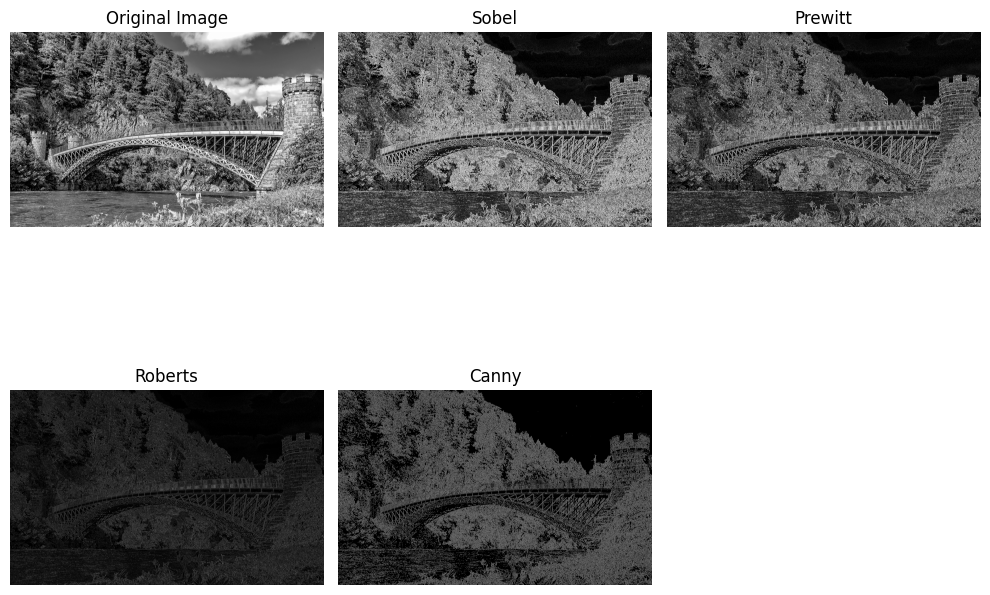

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_sobel(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobelx, sobely)
    return np.uint8(np.clip(sobel, 0, 255))

def apply_prewitt(image):
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32) # Changed kernel data type to float32
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32) # Changed kernel data type to float32
    prewittx = cv2.filter2D(image, cv2.CV_32F, kernelx) # Changed ddepth to cv2.CV_32F
    prewitty = cv2.filter2D(image, cv2.CV_32F, kernely) # Changed ddepth to cv2.CV_32F
    prewitt = cv2.magnitude(prewittx, prewitty)
    return np.uint8(np.clip(prewitt, 0, 255))

def apply_roberts(image):
    kernelx = np.array([[1, 0], [0, -1]], dtype=np.float32) # Define kernelx with float32 type
    kernely = np.array([[0, 1], [-1, 0]], dtype=np.float32) # Define kernely with float32 type
    robertsx = cv2.filter2D(image, cv2.CV_32F, kernelx) # Use CV_32F for ddepth
    robertsy = cv2.filter2D(image, cv2.CV_32F, kernely) # Use CV_32F for ddepth
    roberts = cv2.magnitude(robertsx, robertsy)
    return np.uint8(np.clip(roberts, 0, 255))

def apply_canny(image):
    return cv2.Canny(image, 100, 200)

def main():
    # Load the image
    image_path = "jembatan.jpg"  # Replace with your image path
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error: Image not found!")
        return

    # Apply edge detection methods
    sobel_edges = apply_sobel(image)
    prewitt_edges = apply_prewitt(image)
    roberts_edges = apply_roberts(image)
    canny_edges = apply_canny(image)

    # Plot the results
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis("off")

    plt.subplot(2, 3, 2)
    plt.title("Sobel")
    plt.imshow(sobel_edges, cmap='gray')
    plt.axis("off")

    plt.subplot(2, 3, 3)
    plt.title("Prewitt")
    plt.imshow(prewitt_edges, cmap='gray')
    plt.axis("off")

    plt.subplot(2, 3, 4)
    plt.title("Roberts")
    plt.imshow(roberts_edges, cmap='gray')
    plt.axis("off")

    plt.subplot(2, 3, 5)
    plt.title("Canny")
    plt.imshow(canny_edges, cmap='gray')
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()



# Penjelasan Deteksi Tepi dengan Sobel, Prewitt, Roberts, dan Canny

## Deskripsi Kode
Kode Python yang dilampirkan menggunakan berbagai metode deteksi tepi pada citra grayscale: Sobel, Prewitt, Roberts, dan Canny. Berikut adalah penjelasan dari setiap metode:

### 1. Fungsi `apply_sobel()`
- Menggunakan operator Sobel untuk mendeteksi tepi dalam arah horizontal (x) dan vertikal (y).
- Menggabungkan gradien dari kedua arah menggunakan magnitude.
- Memberikan hasil tepi yang halus dengan penekanan pada kontur utama.

### 2. Fungsi `apply_prewitt()`
- Menggunakan operator Prewitt, yaitu filter linier untuk mendeteksi tepi horizontal dan vertikal.
- Kernel Prewitt menghitung gradien dan hasilnya digabungkan menggunakan magnitude.
- Hasilnya mirip Sobel tetapi lebih kasar.

### 3. Fungsi `apply_roberts()`
- Menggunakan operator Roberts untuk mendeteksi tepi dengan menghitung perbedaan intensitas piksel secara diagonal.
- Sensitif terhadap noise dan memberikan hasil tepi yang tajam tetapi tipis.

### 4. Fungsi `apply_canny()`
- Metode deteksi tepi Canny melibatkan langkah-langkah berikut:
  1. Gaussian blur untuk mengurangi noise.
  2. Deteksi gradien menggunakan operator Sobel.
  3. Non-maximum suppression untuk menyempurnakan garis tepi.
  4. Penggunaan threshold ganda untuk mendeteksi dan menghubungkan tepi yang signifikan.
- Memberikan hasil deteksi tepi yang akurat dan detail.

---

## Penjelasan Hasil
### 1. **Gambar Asli**
- Gambar grayscale yang menjadi input untuk deteksi tepi.

### 2. **Sobel**
- Menampilkan tepi utama dari gambar dengan hasil yang halus dan detail.
- Cocok untuk mendeteksi kontur besar, seperti tepi jembatan.

### 3. **Prewitt**
- Mirip dengan Sobel tetapi lebih sederhana. Hasilnya sedikit kurang halus.
- Kurang optimal untuk gambar dengan noise atau detail halus.

### 4. **Roberts**
- Memberikan hasil tepi yang tajam dan garis tipis.
- Efektif untuk gambar tanpa banyak noise, tetapi kurang optimal untuk detail kompleks.

### 5. **Canny**
- Memberikan hasil deteksi tepi paling presisi dan halus.
- Cocok untuk aplikasi yang memerlukan analisis tepi yang akurat, seperti pengenalan objek atau segmentasi.

---

## Kesimpulan
- **Sobel** dan **Prewitt**: Sederhana dan cocok untuk aplikasi dasar.
- **Roberts**: Memberikan tepi yang tajam tetapi rentan terhadap noise.
- **Canny**: Deteksi tepi yang paling presisi, cocok untuk analisis citra tingkat lanjut meskipun lebih kompleks.

Jika Anda memerlukan penyesuaian atau penjelasan tambahan, silakan hubungi saya!
